# TP3 : Intégration numérique
## Objectif   
**L'objectif de ce TP est de :**
- **Programmer certaines méthodes composites d'intégration numérique.**
- **Comparer, visuellement et via les claculs, les valeurs approchées de l'intégrale d'une fonction $f$ continue sur $[a,b]\subset\mathbb{R}$ à celle exacte.**
- **Etudier l'évolution de l'erreur d'intégration en fonction du nombre de points d'intégration et/ou le nombre de sous intervalles de $[a,b]$ à considérer.**


## Rappel du Cours

**Les méthodes numériques utilisées pour calculer la valeur exacte de l'integrale $I$ d'une fonction continue $f$ sur un intervalle $[a,b]$ ne sont pas toujours efficaces et conduisent généralement à d'avantages de calculs. En analyse numérique, il existe une vaste famille d'algorithmes dont le but principal est d'estimer la valeur exacte de $I$.**

**Les méthodes qui seront étudiées dans ce TP sont :**
- **la méthode composite des rectangles (à gauche, à droite et au milieu).**
- **la méthode composite des trapèzes.**
- **la méthode composite de Simpson.**

### Principe général
**Soit $f: [a,b] \rightarrow \mathbb{R}$ une fonction continue. Il s'agit d'approcher la valeur de $I(f)=\displaystyle\int_a^b f(t) \,dt$.**

**Pour ce faire, nous commençons par subdiviser l'intervalle $[a,b]$ en $n$ sous-intervalles $[x_k,x_{k+1}]$, $0\leq k \leq n-1$, de largeur uniforme $h=\displaystyle \frac{b-a}{n}$, tels que $x_k=a+kh$, $\forall\,0\leq k\leq n$. Ainsi, $$I(f)=\displaystyle\int_a^b f(t)\,dt= \displaystyle\sum_{k=0}^{n−1} \int_{x_k}^{x_{k+1}} f(t)\,dt.$$**  

**Ensuite, en approchant $\displaystyle \int_{x_k}^{x_{k+1}} f(t)\,dt$, $0\leq k \leq n-1$ par l'une des méthodes simples suivantes, appliquée sur $[x_k,x_{k+1}]$ :**

1. **Rectangle à droite simple :** 
$$\displaystyle I_{RD}^s(f)=f(x_{k+1})(x_{k+1}-x_k)$$


2. **Rectange à gauche simple :** 
$$\displaystyle I_{RG}^s(f)=f(x_{k})(x_{k+1}-x_k)$$


3. **Rectange du point milieu simple :** 
$$\displaystyle I_{RM}^s(f)=f(\frac{x_k+x_{k+1}}{2})(x_{k+1}-x_k)$$ 


4. **Trapèze simple :** 
$$\displaystyle I_{T}^s(f)=\frac{f(x_k)+f(x_{k+1})}{2}(x_{k+1}-x_k)$$


5. **Simpson simple :** 
$$\displaystyle I_{S}^s(f)=\frac{x_{k+1}-x_k}{6}\big[f(x_k)+4f(\frac{x_k+x_{k+1}}{2})+f(x_{k+1})\big]$$

**Nous obtenons la formule composite associée pour approcher $I(f)$.** 

**Les abréviations $Rg$, $Rd$, $Rm$, $T$, $S$, $s$, et $c$ désignent, respectivement, Rectangle à gauche, Rectangle à droite, Rectangle milieu, Trapèze, Simpson, simple et composite.**


**Dans tout ce qui suit, nous considérons une fonction $f$ continue sur $[a,b]\subset\mathbb{R}$ et $x_k=a+kh$, $\quad 0\leq k \leq n$ les points d'intégrations issus de la subdivision de $[a,b]$ en $n$ sous intervalles avec un pas fixe $\displaystyle h=\frac{b-a}{n}$.**

## Méthodes composites des rectangles



In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Formule de la méthode composite du rectangle à droite 

$$I(f)\approx I_{RD}^c(f)=h\,\sum_{k=1}^{n}\,f(x_k)=h\,\sum_{k=1}^{n}\,f(a+kh).$$




**Ecrire une fonction ```rectangle_droite_composite(f,a,b,n)```  prenant en entrée $f$, une fonction continue sur $[a,b]$, $a$, $b$, les bornes de $[a,b]$ et $n$, le nombre de sous intervalles à considérer et retourne la valeur approchée $I_{RD}^c(f)$.**

In [2]:
def rectangle_droite_composite(f,a,b,n):
    h=(b-a)/n
    I=0
    for k in np.arange(1,n+1):
        I+=f(a+k*h)
    return h*I

### Exercice 1 
**On considère la fonction $\displaystyle f(t)=e^{-t^2}$, $t\in[-1,1]$.**

**Dans cet exercice nous allons faire la comparaison graphique de la valeur de l'intégrale $I(f)$ et la valeur approximative donnée par la méthode du rectangle à droite en utilisant la fonction `plt.fill_between`.**

**Cette fonction est utilisée pour visualiser  l'aire limitée par deux fonctions $f$ et $g$ sur un même intervalle :  ```plt.fill_between(t,f(t),g(t))```**

1. **Pour $n=4$, sur un même graphe, représenter la fonction $f$ en bleu et la valeur approchée $I_{RD}^c(f)$ en rouge.**


2. **Retracer les figures pour $n=10$. Observer les résultats et conclure.**





### Question $(1)$

Text(0.5, 1.0, 'Approximation de $\\int_{-1}^1 e^{-t^2}dt$ par la méthode des rectangles à droite (n=4)')

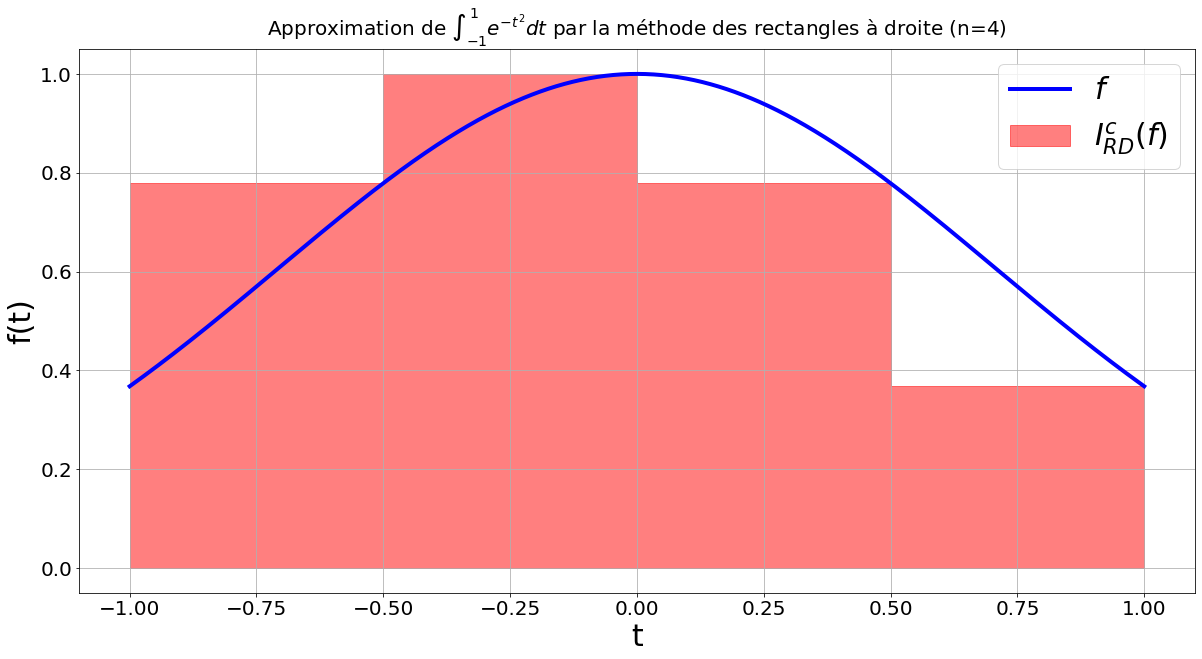

In [3]:
f=lambda x: np.exp(-x**2)
t=np.linspace(-1,1,1000)
x=np.linspace(-1,1,5)
#x=np.arange(-1,1.1,1/2)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(t,f(t),color="blue",linewidth=4)
plt.fill_between(x,f(x),step='pre',color="red",alpha=0.5)
plt.legend(('$f$','$I_{RD}^c(f)$'),loc=0,fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('t',fontsize=30)
plt.ylabel('f(t)',fontsize=30)
plt.title('Approximation de $\int_{-1}^1 e^{-t^2}dt$ par la méthode des rectangles à droite (n=4)', fontsize=20)


### Question $(3)$

Text(0.5, 1.0, 'Approximation de $\\int_{-1}^1 e^{-t^2}dt$ par la méthode des rectangles à droite (n=10)')

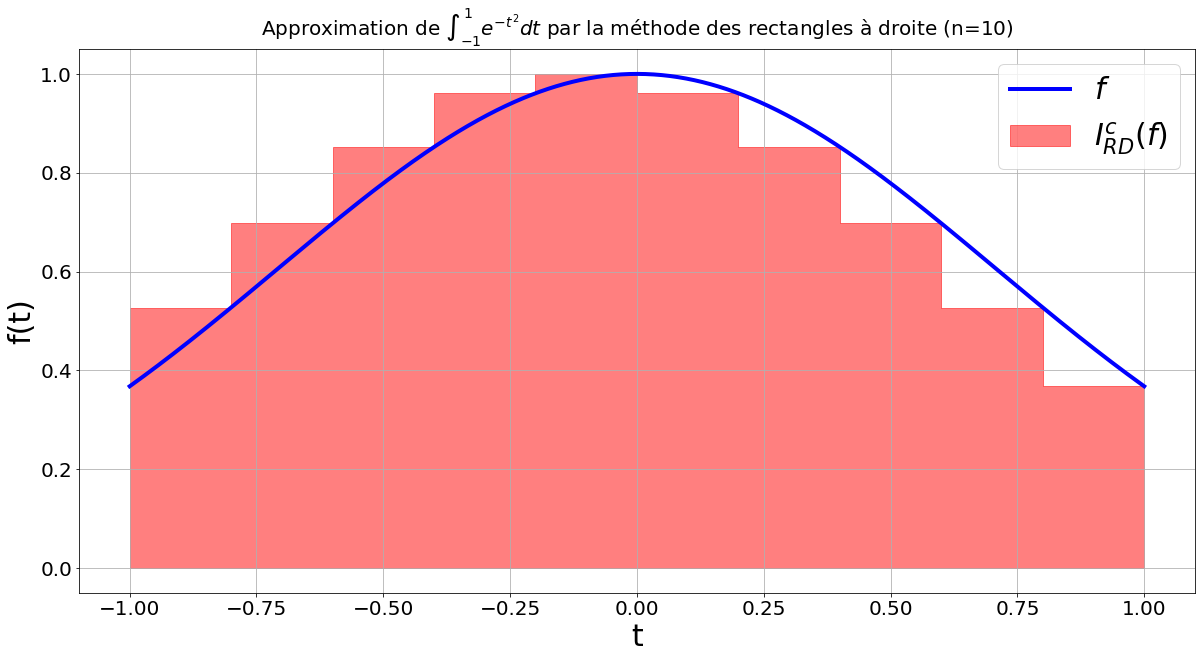

In [4]:

x=np.linspace(-1,1,11)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(t,f(t),color="blue",linewidth=4)
plt.fill_between(x,f(x),step='pre',color="red",alpha=0.5)
plt.legend(('$f$','$I_{RD}^c(f)$'),loc=0,fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('t',fontsize=30)
plt.ylabel('f(t)',fontsize=30)
plt.title('Approximation de $\int_{-1}^1 e^{-t^2}dt$ par la méthode des rectangles à droite (n=10)', fontsize=20)

### Le module Sympy
**Le module Sympy permet de faire le calcul mathématique formel, exemple le calcul de primitive et le calcul d'intégrale en utilisant la fonction ``integrate``.** 

$\bullet$ **Il faut faire appel à la bibliothèque sympy en utilisant ``import sympy as sp``**

$\bullet$ **Avant de pourvoir utiliser des variables symboliques, il faut les déclarer comme symboles:
```x=sp.symbols('x')```**

$\bullet$ **Ensuite faire des opérations entre symboles, exemple:**

$a.$ **Pour trouver la primitive d'une fonction $f$, on utilise $\int f(x) dx = $ ``sp.integrate(f(x),x)``**

$b.$ **Pour calculer l'intégrale $I(f)=\int_{a}^{b} f(x) dx $, on utilise ``sp.integrate(f(x),(x,a,b))``.**

$c.$ **Pour donner la valeur numérique de l'intégrale $I(f)=\int_{a}^{b} f(x) dx $, on utilise ``sp.integrate(f(x),(x,a,b)).evalf()``.**



### Exercice 2  

1. **Calculer la primitive de la fonction $f(x)=e^{-x},\, x\in \mathbb{R}$ en utilisant le module sympy.**


2. **Calculer la valeur de l'intégrale $\int_{0}^{1} e^{-x} dx $.**


3. **Calculer la valeur de l'intégrale $\int_{-1}^{1} e^{-x^2} dx $.**


4. **Calculer l'erreur d'integration de la méthode composite du rectangle à droite pour $n=4$ et $n=10$.**


### Question $(1)$


In [5]:
import sympy as sp
x=sp.symbols('x')
sp.integrate(sp.exp(-x),x)

-exp(-x)

### Question $(2)$

In [6]:
sp.integrate(sp.exp(-x),(x,0,1))

1 - exp(-1)

In [7]:
sp.integrate(sp.exp(-x),(x,0,1)).evalf()

0.632120558828558

### Question $(3)$

In [8]:
I=sp.integrate(sp.exp(-x**2),(x,-1,1)).evalf()
I

1.49364826562485

### Question $(4)$

In [9]:
#pour n=4
E=np.abs(rectangle_droite_composite(f,-1,1,4)-I)
print(E)

0.0309077619677278


In [10]:
#pour n=10
E1=np.abs(rectangle_droite_composite(f,-1,1,10)-I)
print(E1)

0.00491158609751952


### Formule de la méthode composite des trapèzes 

$$I(f)\approx I_T^c(f) =\frac{h}{2}\,\Big(f(a)+2\sum_{k=1}^{n-1}\,f(a+kh)+f(b)\Big).$$



1. **Ecrire une fonction ```trapèze_composite(f,a,b,n)```  prenant en entrée $f$, une fonction continue sur $[a,b]$, $a$, $b$, les bornes de $[a,b]$ et $n$, le nombre de sous intervalles à considérer et retourne la valeur approchée $I_{T}^c(f)$.**

**On considère la fonction $\displaystyle f(t)=e^{-t^2}$, $t\in[-1,1]$.**

2. **Pour $n=4$ et sur un même graphe, représenter la valeur exacte $I(f)$ en bleu et la valeur approchée $I_{T}^c(f)$ en rouge.**


3. **Retracer les figures pour $n=10$. Observer les résultats et conclure.**


4. **Calculer l'erreur d'intégration de la méthode composite de trapèze pour $n=4$ et $n=10$ et comparer les résultats**

### Question $(1)$

In [11]:
def trapèze_composite(f,a,b,n):
    h=(b-a)/n
    I=h*(f(a)+f(b))/2
    for k in np.arange(1,n):
        I+=h*f(a+k*h)
    return I

### Question $(2)$

Text(0.5, 1.0, 'Approximation de $\\int_{-1}^1 e^{-t^2}dt$ par la méthode des trapèzes (n=4)')

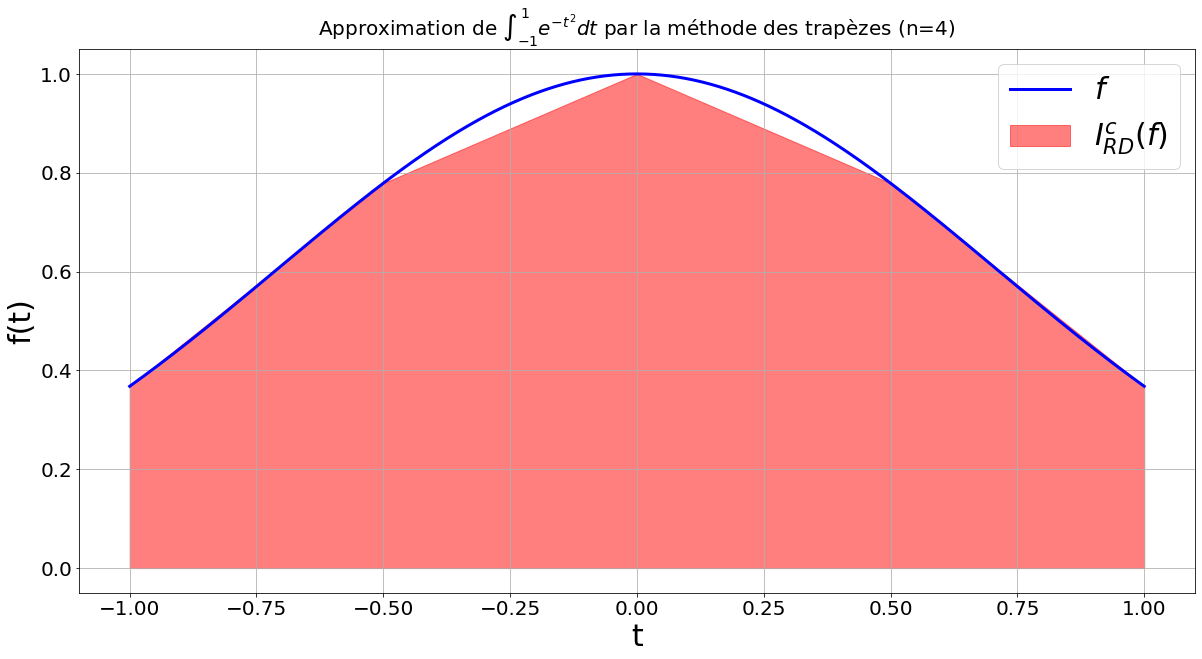

In [12]:
x=np.linspace(-1,1,5)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(t,f(t),color="blue",linewidth=3)
plt.fill_between(x,f(x),color="red",alpha=0.5)
plt.legend(('$f$','$I_{RD}^c(f)$'),loc=0,fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('t',fontsize=30)
plt.ylabel('f(t)',fontsize=30)
plt.title('Approximation de $\int_{-1}^1 e^{-t^2}dt$ par la méthode des trapèzes (n=4)', fontsize=20)

### Question $(3)$

Text(0.5, 1.0, 'Approximation de $\\int_{-1}^1 e^{-t^2}dt$ par la méthode des trapèzes (n=10)')

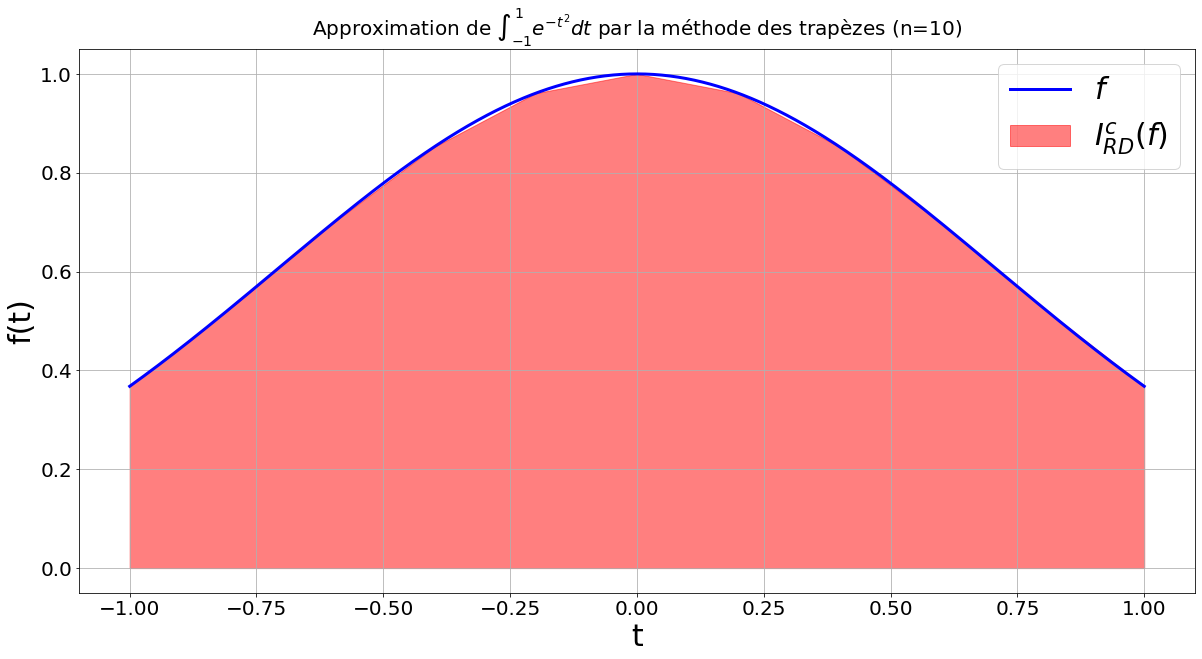

In [13]:
x=np.linspace(-1,1,11)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(t,f(t),color="blue",linewidth=3)
plt.fill_between(x,f(x),color="red",alpha=0.5)
plt.legend(('$f$','$I_{RD}^c(f)$'),loc=0,fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('t',fontsize=30)
plt.ylabel('f(t)',fontsize=30)
plt.title('Approximation de $\int_{-1}^1 e^{-t^2}dt$ par la méthode des trapèzes (n=10)', fontsize=20)

### Question $(4)$

In [14]:
#pour n=4
E=np.abs(trapèze_composite(f,-1,1,4)-I)
#pour n=10
E1=np.abs(trapèze_composite(f,-1,1,10)-I)
print(E,E1)

0.0309077619677278 0.00491158609751996




### Formule de la méthode composite de Simpson  

$$I(f)\approx I_S^c(f)= \frac{h}{3}\,\Big(f(a)+4\sum_{k=0}^{p-1}\,f(a+(2k+1)h)+2\sum_{k=1}^{p-1}\,f(a+2kh)+f(b)\Big),$$
**avec $n=2p$, $p\in\mathbb{N}^*$.**



1. **Ecrire une fonction ```Simpson_composite(f,a,b,n)```  prenant en entrée $f$, une fonction continue sur $[a,b]$, $a$, $b$, les bornes de $[a,b]$ et $n$, le nombre de sous intervalles à considérer et retourne la valeur approchée $I_{S}^c(f)$.**

**On considère la fonction $\displaystyle f(t)=e^{-t^2}$, $t\in[-1,1]$.**

2.  **Calculer l'erreur d'intégration de la méthode composite de Simpson pour $n=4$ et $n=10$ et comparer les résultat**

### Question $(1)$


In [15]:
def Simpson_composite(f,a,b,n):
    h=(b-a)/n
    I=f(a)+f(b)
    p=n//2
    for k in np.arange(0,p):
        I+=4*f(a+(2*k+1)*h)
    for k in np.arange(1,p):
        I+=2*f(a+2*k*h)
    return h*I/3


### Question $(2)$


In [28]:
#pour n=4
E=np.abs(Simpson_composite(f,-1,1,4)-I)
#pour n=10
E1=np.abs(Simpson_composite(f,-1,1,10)-I)
print(E,E1)

1.52452876494121 1.52124653106718


## Nombre d'itérations 

**L'Objectif de cette partie est de comparer les différentes méthodes d'intégration numérique, programmées dans ce TP, en terme de nombre d'itérations nécessaires pour approcher l'intégrale
 $I=\displaystyle \int_{a}^{b} f(t)dt$ avec une précision $\varepsilon$ donnée.**
 
 
**Ecrire une fonction ```integrale_precise(f, I, epsilon, methode)``` qui permet de déterminer le nombre d'itérations garantissant  une valeur approchée à $\varepsilon$ près, en fonction de la précision epsilon, la valeur de $I$ et une méthode parmi les méthodes d'intégrations numériques définies ci-dessus.**

In [32]:
def integrale_precise(f,I,epsilon, methode):
    n=2
    val =methode(f,a,b,n)
    while (np.abs(val-I) >epsilon):
        n+=1
        val=methode(f,a,b,n)
    return n

### Application:
**On considère la fonction $\displaystyle f(t)=\sqrt{t+1}$, $t\in[0,1]$.**

**Trouver un nombre d'itérations garantissant  une valeur approchée avec une précision $\varepsilon=10^{-1}$ en utilisant la méthode du trapèze.**

In [40]:
g=lambda t:np.sqrt(1+t)
a=0
b=1
t=sp.symbols('t')
I=sp.integrate(sp.sqrt(t+1),(t,0,1)).evalf()
epsilon=10**(-6)
int = integrale_precise(g,I,epsilon,trapèze_composite)
print('Le nombre de sous-intervalles pour la méthode du trapèze composite pour epsilon = 1e-6 est égale à :',int)
int = integrale_precise(g,I,epsilon,Simpson_composite)
print('Le nombre de sousintervalles pour la méthode de Simpson composite pour epsilon = 1e-6 est égale à :',int)

Le nombre de sous-intervalles pour la méthode du trapèze composite pour epsilon = 1e-6 est égale à : 111
Le nombre de sousintervalles pour la méthode de Simpson composite pour epsilon = 1e-6 est égale à : 8


### Exercice 3:  
**On considère la fonction $\displaystyle f(t)=\frac{1}{1+t^2}$, $t\in[0,1]$.**
1. **Donner la valeur de $I=\displaystyle \int_{0}^{1}f(t)dt$.** 
2. **Pour $\varepsilon=10^{-1}$, $\varepsilon=10^{-2}$ et $\varepsilon=10^{-3}$, quel est le nombre de sous-intervalles $n$ à considèrer garantissant une erreur inférieure à $\varepsilon$ pour chacune des méthodes suivantes.** 
   
   a. **La méthode du rectangle à droite.**  
   
   b. **La méthode du trapèze.**  
   
   c. **La méthode de Simpson.**
   
   
   
   
3. **Comparer la convergence des méthodes en terme du nombre d'itérartion nécessaire.**


### Réponse 1:

In [41]:
x=sp.Symbol('x')
I=sp.integrate(1/(1+x**2),(x,0,1)).evalf()
I

0.785398163397448

### Réponse 2:

In [42]:
f=lambda x: 1/(1+x**2)
epsilon=10**(-2)
N_r_d=integrale_precise(f,I,epsilon,rectangle_droite_composite)
N_t=integrale_precise(f,I,epsilon,trapèze_composite)
N_s=integrale_precise(f,I,epsilon,Simpson_composite)
print('La valeur exacte de I est =', I)
print('le nombre necessaire de sous intervalles pour estimer I en utilisant la méthode de rectange à droite à epsilon près =', epsilon,' est :', N_r_d)
print('le nombre necessaire de sous intervalles pour estimer I en utilisant la méthode du trapèze à epsilon près =', epsilon,' est :', N_t) 
print('le nombre necessaire de sous intervalles pour estimer I en utilisant la méthode de simpson à epsilon près =', epsilon,' est :', N_s)



La valeur exacte de I est = 0.785398163397448
le nombre necessaire de sous intervalles pour estimer I en utilisant la méthode de rectange à droite à epsilon près = 0.01  est : 26
le nombre necessaire de sous intervalles pour estimer I en utilisant la méthode du trapèze à epsilon près = 0.01  est : 3
le nombre necessaire de sous intervalles pour estimer I en utilisant la méthode de simpson à epsilon près = 0.01  est : 2


### Exercice 4 :

**On considère la fonction $f(t)=\displaystyle te^{-t}$, $\displaystyle t\in[-1,1]$.** 
1. **Calculer la valeur exacte de $I(f)=\displaystyle \int_{-1}^1 f(t)dt$.**
2. **pour $n\in\{10, 20, 30,\cdots,10^3\}$, calculer les erreurs d'intégration pour l'approximation de $I(f)$ par $I_{RM}^c$, $I_{T}^c$ et $I_S^c(f)$ en fonction de $n$ le nombre de sous-intervalles de $[-1,1]$.**
3. **Sur un même graphe, tracer l'évolution de l'erreur d'intégration.**

### Réponse 1

In [43]:
t=sp.symbols('t')
J=sp.integrate(t*sp.exp(-t),(t,-1,1)).evalf()

### Réponse 2

In [44]:
f=lambda t:t*np.exp(-t)
a=-1
b=1
Err_RD=[]
Err_T=[]
Err_S=[]
for i in np.arange(10,10**3+1,10):
    Err_RD.append(np.abs(J-rectangle_droite_composite(f,a,b,i)))
    Err_T.append(np.abs(J-trapèze_composite(f,a,b,i)))
    Err_S.append(np.abs(J-Simpson_composite(f,a,b,i)))

#Err_S

### Réponse 3

Text(0, 0.5, "Erreur d'intégration")

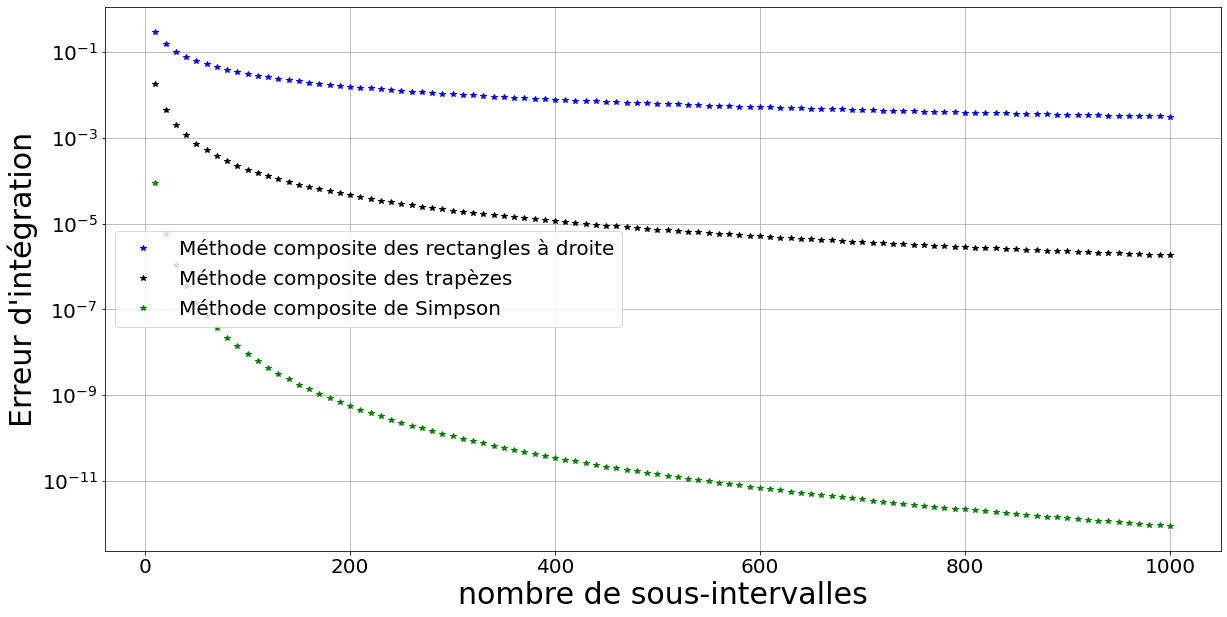

In [45]:
t=np.arange(10,10**3+1,10)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(t,Err_RD,'b*',t,Err_T,'k*',t,Err_S,'g*')
plt.legend(('Méthode composite des rectangles à droite', 'Méthode composite des trapèzes', 'Méthode composite de Simpson'),fontsize=20,loc=0)
#plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('nombre de sous-intervalles', fontsize=30)
plt.ylabel('Erreur d\'intégration', fontsize=30)
#plt.title('Approximation de $\int_{-1}^1 e^{-t^2}dt$ par la méthode des trapèzes (n=4)', fontsize=30)

## Application ``(Asynchrone)``

**On lance une fusée verticalement du sol et on mesure son accélération $\gamma$ durant les premières 80 secondes.**

**Les mesures montrent que $\gamma$ évolue en fonction de $t$ selon la fonction $\gamma(t)=\sqrt{0.1t^2+900}$. Soit $V$ la vitesse de la fusée à chaque instant $t$.**

(a) **Sachant qe $V(0)=0$, déterminer l'expression de $V$ en fonction de $t$.**  

(b) **Calculer la vitesse $V$ de la fusée à l’instant $t = 80s$, par la méhode composée des trapèzes pour $n \in \{10,100,1000\}$.**

(c) **Calculer la vitesse $V$ de la fusée à l’instant $t = 80s$, par la méthode composée de Simpson pour $n \in \{10,100,1000\}$.**

### Solution

(a) On sait que $$V(t)= V(0)+\int_0^t \gamma(s)ds.$$ Comme $V(0)=0$, alors $$V(t)= \int_0^t \gamma(s)ds.$$

(b) Méthode composée du trapèzes

(c) Méthode composée de Simpson

# Références  

[1] [Kiusalaas, J. (2013). Numerical methods in engineering with Python 3. Cambridge university press.](https://books.google.tn/books?hl=fr&lr=&id=YlkgAwAAQBAJ&oi=fnd&pg=PP10&dq=numerical+methods+in+engineering+&ots=-42y60OrWf&sig=wxL2oISNUKKPlvgH4-tsYh1RK9o&redir_esc=y#v=onepage&q=numerical%20methods%20in%20engineering&f=false)  
[2] [Numpy Package](https://numpy.org/devdocs/user/quickstart.html)  
[3] [Mathplotlib Package](https://matplotlib.org/tutorials/index.html#introductory)  
[4] [Jupyter markdowns](http://faccanoni.univ-tln.fr/user/enseignements/20182019/M62-CM1.pdf)  
[5] [Sympy Package](https://www.sympy.org/en/index.html)